## NAME: Harshika Pareek
STUDENT ID: R00183192

# INTRODUCTION:
## Task Definition
Our basic task is to create an algorithm to classify whether an image contains a dog or a cat. The input for this task is images of dogs or cats from training dataset, while the output is the classification
accuracy on test dataset. The dataset comprised 1000 training images and 100 test images.

## Overview
The image processing is a very common topic of research. It is known that the syatem defines an Image in the form an array of pixels and the size can be defined as 300 * 300*3 where 300 is width 300 is height and 3 is RGB channel values.The difference of how human seeing an image and how computer is refer as semantic gap.In this problem, we train the classifier and classifier has to recognize an image based on its label.



In [0]:
import sys
sys.path.insert(0,'/content/Project3_files/data/train')

In [1]:
from zipfile import ZipFile
file_name = "Project3_files.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall() 
  print('done')


done


In [0]:
import os 

if 'COLAB_TPU_ADDR' not in os.environ: 
  print('Not connected to TPU') 
else: 
  print("Connected to TPU") 


Not connected to TPU


In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

## Import all the required libraries/packages

In [0]:
import numpy as np   #An array of an object
import pandas as pd   #Data Manupilation Library
from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import random
import os
#print(os.listdir("../input"))

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

### OpenCv:
cv2 also called OpenCV, is an image and video processing library available in Python and many other high level programming languages. It is used for all sorts of image and video analysis, like facial recognition and detection.

In [0]:
import cv2 #Open CV

In [0]:
#Read the files 
train_dir = "/content/Project3_files/data/train"
#test_dir = 'D:/Sem2/Machine Learning/Project3/Project3_files/Project3_files/data/test'

train_dogs = ['/content/Project3_files/data/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] #get dog images
train_cats = ['/content/Project3_files/data/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  #get cat images

#test_imgs =  ['D:/Sem2/Machine Learning/Project3/Project3_files/Project3_files/data/test/{}'.format(i) for i in os.listdir()]

train_imgs = train_dogs + train_cats # Contatinate both the images into a single list
random.shuffle(train_imgs)
#print(train_imgs)



#### Procedure Followed:
1. 
Here we create two variables train_dogs and train_cats. One for all dog images and the other for cat images. We write a list comprehension that uses the command os.listdir() to get all the images in the train data zip file and retrieve all images with dog in their name.

2.
We will do random shuffiling of the images.

In [0]:
nrows = 150   #Height
ncolumns = 150  #weidth
channels = 3     #RGB Channels

def read_process_image(list_of_images):

  X =[]  #get the images
  y =[]  #get the labels

  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    #Seperate the labels
    if 'dog' in image:
      y.append(1)
    elif 'cat' in image:
      y.append(0)
  return X,y

### Image Pre-Processing Steps:
 RGB Channels
 Types of Pixles
1)Grey Scale: Each pixles scalar value is between 0 to 255.
2)color pixes: Represnted in RGB(red, green and blue) can be defined in the scale ranges [0:255]

Image Resizing:
1)Image Resize : Image resize will chnage the height and weidth of an image it can be defined by us else it will resize with defaults.

Syntax
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

src : is the source, input image in the form of numpy array
dsize: s the desired size of the output image, given as tuple
fx:is the scaling factor along X-axis or Horizontal axis
fy:is the scaling factor along Y-axis or Vertical axis
interpolation:a method that decides which pixel gets which value based on its neighboring pixels and the scale at which the image is being resized.

2)Convert to numpy array: Since a system only can read the images as array of pixels we have to convert our images as an array. The point to note here, we have to separate the features and labels from the images before proceeding with the model building.

Well, remember we said lets 1 and 0 represent dogs and cats respectively.

In [0]:
X,y = read_process_image(train_imgs)

In [0]:
print(y)

[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 

In [0]:
del train_imgs  
gc.collect()  #clean the garbage/Unnecessary data

164

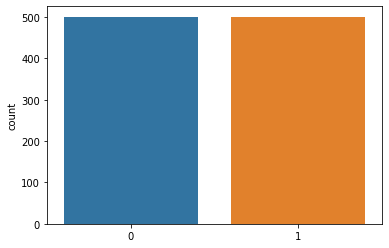

In [0]:
X = np.array(X) #Convery images into numpy array
y = np.array(y)  #convert lables in an numpy array

sns.countplot(y)


#### Plot Interpretation:
Great! we have 1002 classes of both dogs and cats.

In [0]:
print(X.shape) #dimension for X(Images)
print(y.shape)  #dimensions of lables(y)

(1002, 150, 150, 3)
(1002,)


#### Split the data into train and test

In [0]:

X_train, X_test,y_train, y_test = train_test_split(X, y , test_size=0.20,random_state=2) #split the data
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(801, 150, 150, 3)
(801,)
(201, 150, 150, 3)
(201,)


#### Procedure Followed
We tell the function we want 20% of the data to be assigned to the validation set and the other 80% to the train set.

#### Interpretation
We can see that our image is a tensor of rank 4, or we could say a 4 dimensional array with dimensions 801 x 150 x 150 x 3 which correspond to the batch size, height, width and channels respectively.

In [0]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)


(801, 67500) (201, 67500)


## Model Building

### Model1:  K-Neareast Neighbour:
This algorithm is very simple and east to model with the image data. This method is based on the distance.

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

First we must compute the distances between all test examples and all train examples.
Given these distances, for each test example we find the k nearest examples and have them vote for the label.

Accuracy:The final accuracy we achieved for this model is 55.23\%

In [0]:
#KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
##Making predictions and gettin accuracy of the classifier
y_pred_knn = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.5522388059701493


### Model2: Logistic Regression:
This methods is also widely used as classification method. we have trained our image classifier on this model and predicted the label for our test data.

Accuracy: 0.5373134328358209

In [0]:
#### Logistic Regression ####

In [0]:
#Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Making predictions and gettin accuracy of the classifier
y_pred_lr = lr.predict(X_test)

logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.5373134328358209

In [0]:
#### SVM ###

### Model3: Support Vector machine
SVM: SVM used for high dimensional data points so that the data can easlity be categorized in a hyperplane.it mainly uses "kernal" trick to tranform your data and based on the transformation it founds a boundry between the outputs. it has been noticed with the past reserach on image classification that SVM opted best accuracy in various image datasets.

Accuracy: 0.6716417910447762

In [0]:
#SVM Classifier
#THIS CELL WILL TAKE TIME
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train) #fit the data(train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Making predictions and gettin accuracy of the classifier
y_pred_svm = svc.predict(X_test)

svc_score = accuracy_score(y_test, y_pred_svm) #prediction on test data
svc_score

0.6716417910447762

#### Accuracy Obtained by different models

In [0]:
#Accuracy score of different Classification algorithms
print("K Nearest Neighbors : ", knn_score)   #knn
print("Logistic Regression : ", logistic_regression_score)   #logistic regression
print("Support Vector Classifier : ", svc_score)   #SVM

K Nearest Neighbors :  0.5522388059701493
Logistic Regression :  0.5373134328358209
Support Vector Classifier :  0.6716417910447762


#### Result:
As per the table, we can see SVM outperforms and give the accuracy 67%. Hence,we will go further and tune the parameter.

In [0]:
#### Hyper Parameter Optimization --- SVM###

### Hyper Parameter Optimization
Types of Kernal

Linear Kernal : This kernal can be used as a normal dot product between any given two observations.

Polynomial Kernal : Distinguish between curved and non linear curve
Radial Basis function : It can map the Space in infinite dimensions, that's why it is the most commonly used kernal. I have got the kernel= 'rbf' as a best hyper parameter kernal after tuning.



In [0]:
#Fit the tuning parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param = {'C': [0.1, 1, 10, 100],
         'gamma': ['scale', 'auto'], 
         'kernel': ['rbf','linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘radial']}
  
grid_search_SVM = GridSearchCV(estimator = SVC(),param_grid=param,cv = 5, n_jobs = -1, verbose = 2)
grid_search_SVM.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 20.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf',
                                    'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, '
                                    '‘radial']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

#### Accuracy Check after getting the best tuning parameters

In [0]:
#Accuracy Check after tuninng
from sklearn.svm import SVC
clf = SVC(C=1.0,cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', kernel='rbf', max_iter=-1,
                            probability=False, random_state=None, shrinking=True,
                            tol=0.001, verbose=False)
clf.fit(X_train,y_train)
preds = clf.predict(X_train)
acc_nb=accuracy_score(preds,y_train)
acc_nb

0.9363295880149812

### Final Result
Accuracy After Tuning:0.9363295880149812

## Approach2: Convolutional Nural Networks

In [0]:
################# Convolutional Nural Networks ###########

## CNN OVERVIEW
CNN models use to train and test the images, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1.

In [0]:
#Define Image Pixels 
FAST_RUN = False
IMAGE_WIDTH=128   
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3   #RGB channels

#### Procedure Followed
In the above process we will define the image pixles such as height weidth and RGB channels.

In [0]:
train_dir = "/content/Project3_files/data/train" #Read the train data
items = os.listdir(train_dir) #List all the images in items 

In [0]:
categories = []        #Define a list of categories to store
for filename in items:
    category = filename.split('.')[0]    
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename':items,
    'category':categories
})

print(df)

         filename  category
0     dog.325.jpg         1
1     dog.156.jpg         1
2     cat.311.jpg         0
3     dog.194.jpg         1
4     cat.302.jpg         0
...           ...       ...
997   cat.410.jpg         0
998   cat.174.jpg         0
999   cat.205.jpg         0
1000  cat.272.jpg         0
1001  dog.254.jpg         1

[1002 rows x 2 columns]


#### Procedure Followed
1. Read the file image data and store in a variable "items"
2. Itearte the images and split with .jpg and appned in the categories
3.AT the same time, seperate the lables(dog and cat) from the images and appned in the list y.
4.AT the end, store data in a data frame df.

In [0]:
df.tail() #View last few lines of the data frame

,filename,category
997,cat.410.jpg,0
998,cat.174.jpg,0
999,cat.205.jpg,0
1000,cat.272.jpg,0
1001,dog.254.jpg,1


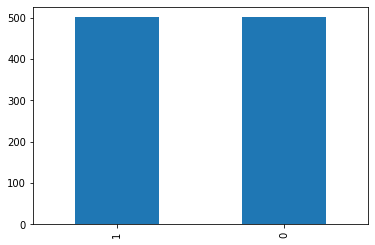

In [0]:
df['category'].value_counts().plot.bar() #plot the value count for 1 and 0 labels

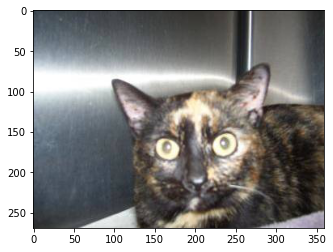

In [0]:
#See sample image
sample = random.choice(items)
image = load_img(train_dir+"/"+sample)
plt.imshow(image)

## CNN PACAKGES AND USED TERMS

ImageDataGenerator: The idea behind using a Keras generator is to get batches of input and corresponding output on the fly during training process, e.g. reading in 100 images, getting corresponding 100 label vectors and then feeding this set to the gpu for training step.

Conv2D: In order to scan the image we it creates a window of an image with its dimensions, which is use in scanning of an image.

MaxPooling2D: After scanning all the images from the windows maxpooling will scan and keep the window with the highest value.

epochs: Epochs is the term which tells, how many forward and backward propagation is required in order to tune weight and bias.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [0]:
model = Sequential() 

In [0]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

### Explanation of the above code
1.Here we create a sequential model. This model gives instruction to keras to stack all layers sequentially.

2.Here we create the first layer by calling the .add() function on the model we created and pass the type of layer we want — a Conv2D layer. 

3.In the above, VGG layers we set some important parameters such as filter size 32, This is the size of the output dimension which means the number of output filters in Convolutional layers.

4.kernel_size 3,3: This specifies the height and width of the 2D convolution window.

5.activation [‘relu’]: We select an activation function also called non-linearity to be used by our neural network. ReLU (Rectified Linear Unit) is the most common activation function used while dealing with the convolutional layers.

6.input shape [150,150,3]: The given are the dimensions of the images we defined and resized the images with.

7.Flattening transforms a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.

8.Dropout:Here we add a Dropout layer with value 0.5. Dropout randomly drops some layers in a neural networks and then learns with the reduced network. This way, the network learns to be independent and not reliable on a single layer. Bottom-line is that it  helps in overfitting,0.5 means to randomly drop half of the layers.

9.The last layer has an output size of 1 and a different activation function called sigmoid. This is because we’re trying to detect if an image is a dog or a cat. i.e we want the model to output a probability of how sure an image is a dog and not a cat, that means we want a probability score where higher values means the classifier believes the image is a dog and lower values means it is a cat.Why Sigmoid function? Sigmoid functions takes the values between 0 and 1 and return probability distribution between 0 and 1.

NEXT WHAT ?

Next we will compile our model

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10) #To prevent overfitting

#### NOTE: 
Overfitting happens when our model memorizes the training data. The model will perform excellently at training time but fail at test time.

To prevent our data from overfitting we will use "Early Stop" concept 

Early Stop
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#### Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [0]:
callbacks = [earlystop, learning_rate_reduction]

In [0]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

#### Data Prepration

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding.So we will convert 1 to dog and 0 to cat



In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

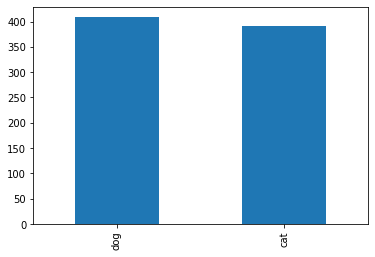

In [0]:
train_df['category'].value_counts().plot.bar()

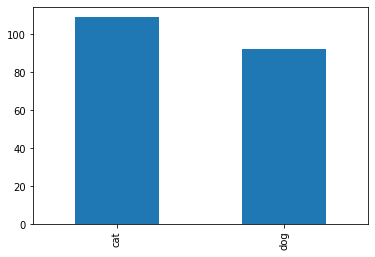

In [0]:
validate_df['category'].value_counts().plot.bar()

In [0]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
print(total_train)
print(total_validate)

801
201


### Normalization
Finally, before we start training our model we need to perform some Normalization, which means scale our images to the unit of standard deviation. and a mean of 0.We’ll use an important module in Keras called 
ImageDataGenerator which performs some important functions when we’re feeding Images into our model during traning

#### ImageDataGenerator
 It performs the following functions for us easily:
1. Decode the JPEG content to RGB grids of pixels.
2. Convert these into floating-point tensors.
3. Rescale the pixel values (between 0 and 255) to the [0, 1] interval ( neural networks perform better with normalize data).
4. It helps us easily augment images. 


In [0]:
train_dir = "/content/Project3_files/data/train"
items = os.listdir(train_dir)
#Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 801 validated image filenames belonging to 2 classes.


#### Explanation of the above lines of code
We pass the rescale option to the ImageDataGenerator object. The rescale=1./255 option is an important parameter. It normalizes the image pixel values to have zero mean and standard deviation

The second set of options is Image augmentation. They tell the ImageDataGenerator to randomly apply some transformation to the Image. This will help to augment our data-set and improve generalization.
Here we also create an ImageDataGenerator object for our validation set. 



In [0]:
#validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 201 validated image filenames belonging to 2 classes.


#### Explanation of above lines of code
we call the .flow( ) method on the data generators we created above passing in the data and label set.
X_train and y_train for training then vaidate_df

The batch size tells the data generator to only take the specified batch(32 in our case) of Images at a time.

Now we train our network by calling .fit( ) method on the model and passing some parameters. The first parameter is the training set ImageDataGenerator object train_generator

Here we specify the number of steps per epoch. This tells our model how many images we want to process before making a gradient update to our loss function.


In [0]:
#see how your generator works
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


Found 1 validated image filenames belonging to 1 classes.


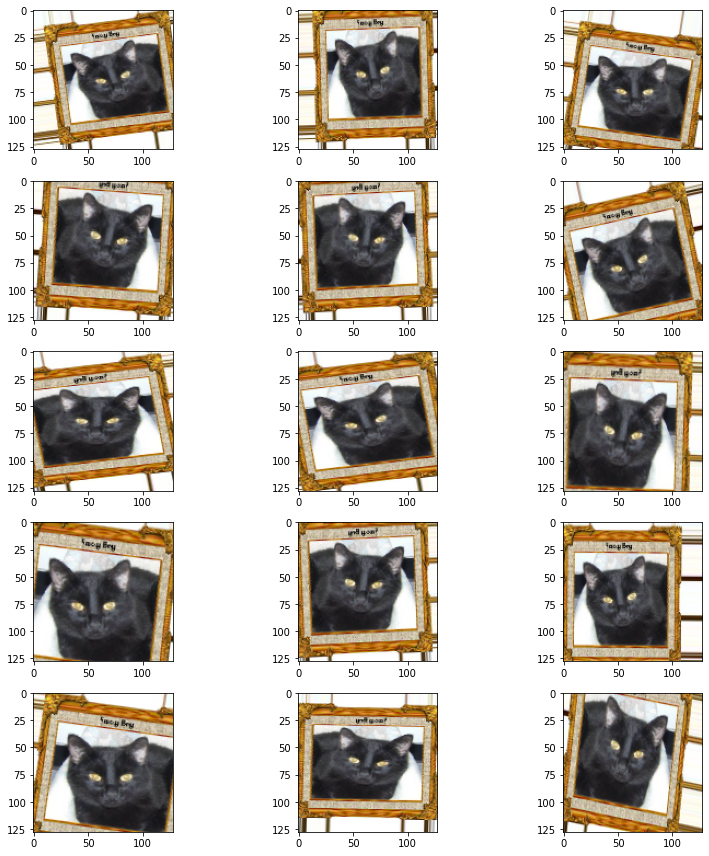

In [0]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [0]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
53/53 [==============================] - 12s 233ms/step - loss: 1.5019 - accuracy: 0.5267 - val_loss: 8.7309 - val_accuracy: 0.5436
Epoch 2/50
 2/53 [>.............................] - ETA: 4s - loss: 1.4540 - accuracy: 0.5667

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


53/53 [==============================] - 6s 112ms/step - loss: 1.1576 - accuracy: 0.5534 - val_loss: 1.7301 - val_accuracy: 0.5430
Epoch 3/50
53/53 [==============================] - 6s 113ms/step - loss: 0.9563 - accuracy: 0.5698 - val_loss: 4.4267 - val_accuracy: 0.5323
Epoch 4/50
53/53 [==============================] - 6s 111ms/step - loss: 0.8818 - accuracy: 0.6049 - val_loss: 3.1310 - val_accuracy: 0.5699
Epoch 5/50
53/53 [==============================] - 6s 111ms/step - loss: 0.8493 - accuracy: 0.5852 - val_loss: 1.7412 - val_accuracy: 0.5430
Epoch 6/50
53/53 [==============================] - 6s 110ms/step - loss: 0.7890 - accuracy: 0.5954 - val_loss: 1.1851 - val_accuracy: 0.5538
Epoch 7/50
53/53 [==============================] - 6s 108ms/step - loss: 0.7390 - accuracy: 0.6050 - val_loss: 1.9934 - val_accuracy: 0.5269
Epoch 8/50
53/53 [==============================] - 6s 109ms/step - loss: 0.6715 - accuracy: 0.6731 - val_loss: 0.9649 - val_accuracy: 0.6022
Epoch 9/50
53/53 

An epoch is a full-cycle or pass through the entire training set. In our case, an epoch is reached when we make 50 gradient updates as specified by our steps_per_epoch parameter.
Epochs = 3, means we want to go over our training data 3 times and each time we will make gradient updates 50 times.
We pass in our validation data generator.
We set the step size here too. I’m going to use the same step size as stated above.

In [0]:
print(train_df)

        filename  category
0    cat.189.jpg         0
1    cat.295.jpg         0
2    dog.144.jpg         1
3    dog.169.jpg         1
4    dog.165.jpg         1
..           ...       ...
796  cat.345.jpg         0
797  dog.384.jpg         1
798  dog.413.jpg         1
799   dog.96.jpg         1
800   cat.86.jpg         0

[801 rows x 2 columns]


In [0]:
print(df)

         filename  category
0     dog.325.jpg         1
1     dog.156.jpg         1
2     cat.311.jpg         0
3     dog.194.jpg         1
4     cat.302.jpg         0
...           ...       ...
997   cat.410.jpg         0
998   cat.174.jpg         0
999   cat.205.jpg         0
1000  cat.272.jpg         0
1001  dog.254.jpg         1

[1002 rows x 2 columns]


In [0]:
df.to_numpy

<bound method DataFrame.to_numpy of          filename  category
0     dog.325.jpg         1
1     dog.156.jpg         1
2     cat.311.jpg         0
3     dog.194.jpg         1
4     cat.302.jpg         0
...           ...       ...
997   cat.410.jpg         0
998   cat.174.jpg         0
999   cat.205.jpg         0
1000  cat.272.jpg         0
1001  dog.254.jpg         1

[1002 rows x 2 columns]>

In [0]:
df.shape


(1002, 2)

### FINAL RESULT
After, running the CNN Model on train and validation set, we get the acuuracy around 79%, we can further improve the model accuracy Maybe increasing the number of epochs and playing with some hyperparameters like batch size and the optimizer will help improve this score.

## REFERENCES
https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9

https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

